In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/by_state/MT/mt_extent_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [4]:
feature_path = './data/by_state/MT/urban/tl_2018_30_tabblock10.shp'
feature = gd.read_file(feature_path).to_crs(grid.crs)
feature = feature.set_index('GEOID10')
feature = gd.clip(feature, grid)

In [5]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['UR10'] = gd.sjoin(grid, feature, how="left", op="within")['UR10']
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

<ipython-input-5-4cfbc5a330c8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['centroid'] = grid['geometry'].centroid


,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10
id,,,,,,,,,
585.0,-1.223775e+07,5.690753e+06,-1.223675e+07,5.689753e+06,-120.0,0,0,"POLYGON ((-109.93360 45.43807, -109.92462 45.4...",R
586.0,-1.223775e+07,5.689753e+06,-1.223675e+07,5.688753e+06,-120.0,0,1,"POLYGON ((-109.93360 45.43177, -109.92462 45.4...",R
1235.0,-1.223675e+07,5.694753e+06,-1.223575e+07,5.693753e+06,-120.0,0,0,"POLYGON ((-109.92462 45.46328, -109.91563 45.4...",R
1889.0,-1.223575e+07,5.694753e+06,-1.223475e+07,5.693753e+06,-120.0,0,0,"POLYGON ((-109.91563 45.46328, -109.90665 45.4...",R
1895.0,-1.223575e+07,5.688753e+06,-1.223475e+07,5.687753e+06,-120.0,0,0,"POLYGON ((-109.91563 45.42546, -109.90665 45.4...",R
...,...,...,...,...,...,...,...,...,...
428560.0,-1.158275e+07,6.085753e+06,-1.158175e+07,6.084753e+06,-120.0,0,1,"POLYGON ((-104.04963 47.87300, -104.04065 47.8...",R
428561.0,-1.158275e+07,6.084753e+06,-1.158175e+07,6.083753e+06,-120.0,0,1,"POLYGON ((-104.04963 47.86697, -104.04065 47.8...",R
428562.0,-1.158275e+07,6.083753e+06,-1.158175e+07,6.082753e+06,-120.0,0,1,"POLYGON ((-104.04963 47.86095, -104.04065 47.8...",R


In [6]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [7]:
grid['urban'] = grid['UR10'].map({'U': True, 'R': False})

In [8]:
grid[grid['UR10'] == 'R']

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10,agreement,urban
id,,,,,,,,,,,
585.0,-1.223775e+07,5.690753e+06,-1.223675e+07,5.689753e+06,-120.0,0,0,"POLYGON ((-109.93360 45.43807, -109.92462 45.4...",R,True,False
586.0,-1.223775e+07,5.689753e+06,-1.223675e+07,5.688753e+06,-120.0,0,1,"POLYGON ((-109.93360 45.43177, -109.92462 45.4...",R,False,False
1235.0,-1.223675e+07,5.694753e+06,-1.223575e+07,5.693753e+06,-120.0,0,0,"POLYGON ((-109.92462 45.46328, -109.91563 45.4...",R,True,False
1889.0,-1.223575e+07,5.694753e+06,-1.223475e+07,5.693753e+06,-120.0,0,0,"POLYGON ((-109.91563 45.46328, -109.90665 45.4...",R,True,False
1895.0,-1.223575e+07,5.688753e+06,-1.223475e+07,5.687753e+06,-120.0,0,0,"POLYGON ((-109.91563 45.42546, -109.90665 45.4...",R,True,False
...,...,...,...,...,...,...,...,...,...,...,...
428560.0,-1.158275e+07,6.085753e+06,-1.158175e+07,6.084753e+06,-120.0,0,1,"POLYGON ((-104.04963 47.87300, -104.04065 47.8...",R,False,False
428561.0,-1.158275e+07,6.084753e+06,-1.158175e+07,6.083753e+06,-120.0,0,1,"POLYGON ((-104.04963 47.86697, -104.04065 47.8...",R,False,False
428562.0,-1.158275e+07,6.083753e+06,-1.158175e+07,6.082753e+06,-120.0,0,1,"POLYGON ((-104.04963 47.86095, -104.04065 47.8...",R,False,False


In [9]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [10]:
confusion_matrix = pd.crosstab(grid['chg_covera'], grid['verizon_co'], rownames=['Challenger Cover'], colnames=['FCC 477 Verizon Coverage'])
print (confusion_matrix)

FCC 477 Verizon Coverage     0     1
Challenger Cover                    
0                         3301  7902
1                          464   231


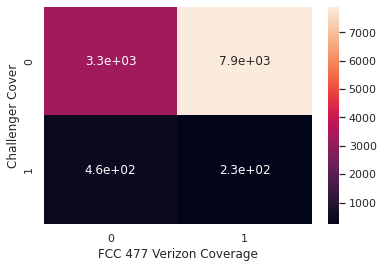

In [11]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [12]:
confusion_matrix = pd.crosstab(grid['urban'], grid['agreement'], colnames=['Agreement'], rownames=['Urban'], normalize='index')
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Agreement     False      True  Total
Urban                               
False      0.702415  0.297585  11842
True       0.833333  0.166667     12


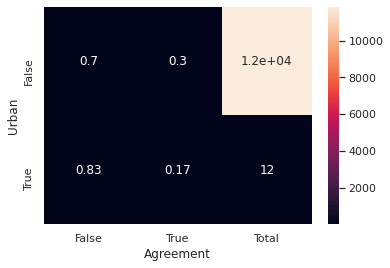

In [13]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()